In [2]:
import sys
import os
from copy import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

import cv2
import time
import datetime
import itertools
import random

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import tensorflow as tf

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [5]:
import tensorflow.keras as keras

from tensorflow.keras import layers, models, optimizers

from tensorflow.keras.models import Sequential, Model, load_model

from tensorflow.keras.layers import (Flatten, Dense, Conv2D, MaxPooling2D, 
                                    Concatenate, Dot, Lambda, Dropout, ZeroPadding2D, Activation, concatenate, 
                                    BatchNormalization, Conv1D, GlobalAveragePooling2D, InputLayer, Input)

from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger, TensorBoard

from tensorflow.keras import backend as K

import tensorflow.keras.utils as utils

from tensorflow.keras.applications import DenseNet201

from tensorflow.keras.datasets import mnist

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# load data 

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [9]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [10]:
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255 
# x_test /= 255 

In [11]:
x_train = x_train / 255 
x_test = x_test / 255 

In [12]:
x_train[0].dtype

dtype('float64')

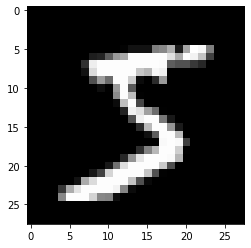

In [13]:
plt.imshow(x_train[0],'gray')
plt.show()

In [14]:
# x_train = x_train.reshape((-1, 28, 28, 1))
# x_test = x_test.reshape((-1, 28, 28, 1))

In [15]:
# print(x_train.shape)
# print(x_test.shape)

In [16]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [17]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

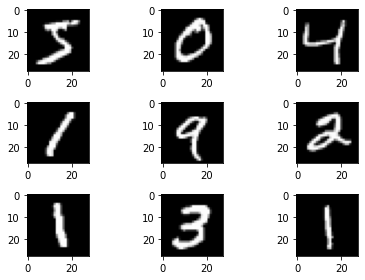

In [19]:
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],'gray')
plt.tight_layout()
plt.show()

# model

In [28]:
model = Sequential()

model.add(InputLayer(input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

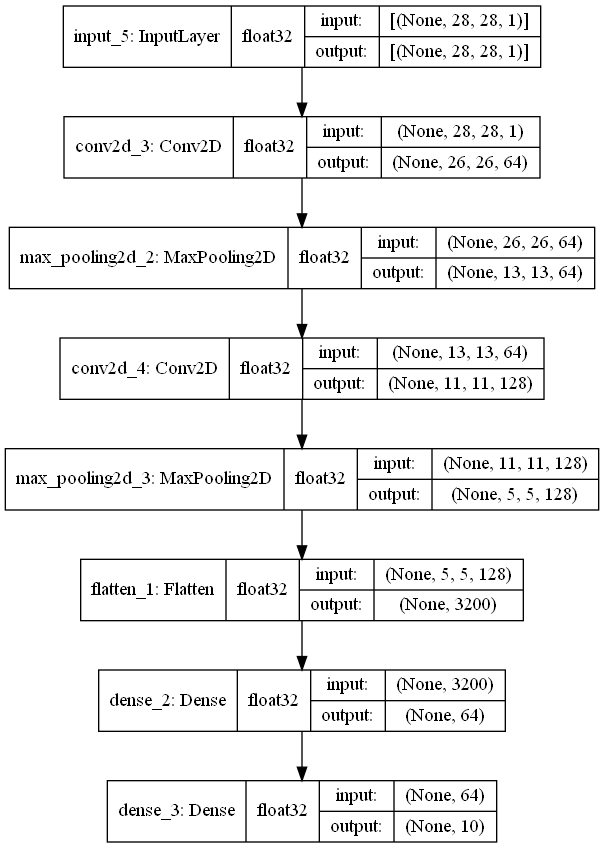

In [29]:
utils.plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [40]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
history = model.fit(x_train, y_train, epochs=10, batch_size=120, validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 12s 16ms/step - loss: 0.4991 - accuracy: 0.8444 - val_loss: 0.0642 - val_accuracy: 0.9808
Epoch 2/10
400/400 [==============================] - 6s 15ms/step - loss: 0.0601 - accuracy: 0.9817 - val_loss: 0.0552 - val_accuracy: 0.9843
Epoch 3/10
400/400 [==============================] - 6s 15ms/step - loss: 0.0390 - accuracy: 0.9878 - val_loss: 0.0473 - val_accuracy: 0.9861
Epoch 4/10
400/400 [==============================] - 6s 15ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0477 - val_accuracy: 0.9860
Epoch 5/10
400/400 [==============================] - 6s 15ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0479 - val_accuracy: 0.9876
Epoch 6/10
400/400 [==============================] - 6s 15ms/step - loss: 0.0195 - accuracy: 0.9932 - val_loss: 0.0458 - val_accuracy: 0.9872
Epoch 7/10
400/400 [==============================] - 6s 15ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0484 - val_accuracy: 0.987

In [42]:
print(model.metrics_names)
print(history.params)
print(history.history.keys())

['loss', 'accuracy']
{'verbose': 1, 'epochs': 10, 'steps': 400}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


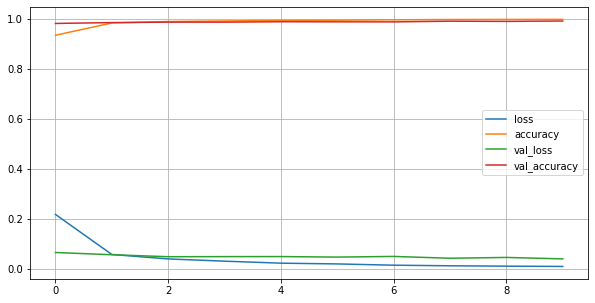

In [43]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.gca()
plt.show()

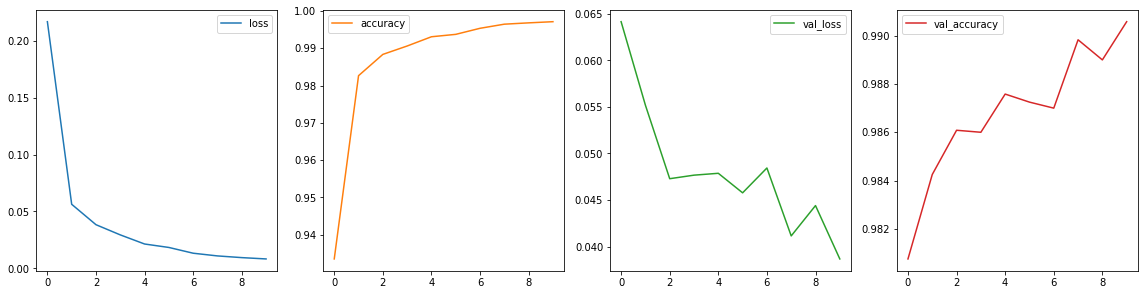

In [44]:
pd.DataFrame(history.history).plot(figsize=(16, 16), layout=(4,4), subplots=True)
plt.tight_layout()
plt.show()

In [45]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0355 - accuracy: 0.9899


[0.03547322750091553, 0.9898999929428101]

In [46]:
y_pred = model.predict(x_test)
# y_pred.round(2)
y_pred

array([[4.3467702e-10, 5.0740800e-11, 8.7538776e-10, ..., 9.9999964e-01,
        1.9019683e-10, 1.9486950e-07],
       [4.2270017e-07, 8.7454220e-07, 9.9999869e-01, ..., 3.5810124e-10,
        1.9347132e-10, 8.5815083e-14],
       [1.9752093e-08, 9.9998581e-01, 1.4693160e-08, ..., 1.1973067e-06,
        8.8332833e-08, 1.3638130e-08],
       ...,
       [6.0392515e-20, 2.7046212e-13, 8.0621096e-19, ..., 2.1453820e-14,
        3.8357509e-13, 4.7954661e-11],
       [1.7170578e-09, 1.0494456e-14, 7.2336095e-16, ..., 4.4245298e-14,
        2.0681978e-06, 5.6276538e-13],
       [2.7579230e-09, 5.9492988e-12, 1.5961475e-10, ..., 2.1456071e-14,
        1.6570904e-09, 5.8610241e-14]], dtype=float32)

In [47]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [49]:
y_pred = model.predict_classes(x_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

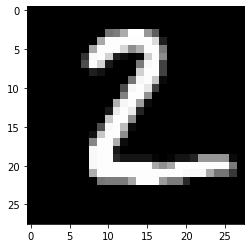

In [50]:
plt.imshow(x_test[1],'gray')
plt.show()

In [52]:
# early_stopping_cb = EarlyStopping(patience=15, restore_best_weights=True)
# checkpoint_cb = ModelCheckpoint("./VGG-16/CNN&VGG16-{epoch:02d}.h5")
# checkpoint_cb = ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [53]:
# callbacks = [
#   EarlyStopping(patience=15, restore_best_weights=True),
#   ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001),
#   CSVLogger("path/model_history_log.csv", append=True),
#   ModelCheckpoint("path/signet-{epoch:003d}.h5"),
#   ModelCheckpoint("path/signet_Best_Model.h5", save_best_only=True)
# ]